# Titanic - Machine Learning from Disaster (kaggle)

**Por: Ana Giulia Moreira de Lima**

O desastre ocorrido com o Titanic é um dos mais conhecidos da história, todo mundo sabe sobre o navio que infelizmente colidiu com um iceberg. Essa tragédia resultou em 1502 mortes entre os 2224 passageiros e tripulantes, mesmo que fatores como a sorte tenham influenciado na sobrevivência, é correto afirmar que alguns grupos tinham maiores vantagens de sobrevivência assim que analisamos questões como classe social, idade, gênero e até mesmo a localização de suas cabines. 

O desafio apresentado no kaggle consiste em utilizar modelos de machine learning para **predição de sobreviventes** no Titanic, desconsiderando o fator de sorte e outros, considerando apenas características comuns a grupos a partir da análise exploratória.

A predição final foi realizada com o uso de **Gradient Boosting Classifier**, atingindo um score de **0.7799** a partir da submissão no kaggle.

### Importação de bibliotecas para análise, plotação, pré-processamento e Machine Learning

Como Python apresenta uma comunidade ativa, temos a grande oportunidade de importar as bibliotecas a seguir para facilitar o processo.

In [3]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import sklearn as skl

In [2]:
# Pré-processamento
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

### Começando com os arquivos a serem trabalhados

Para esse processo, utilizei os arquivos 'test.csv' e 'train.csv', se tornará visível brevemente que ambos não apresentam a mesma quantidade de colunas e nem mostram as mesmas informações.

In [4]:
test_path = 'test.csv'
train_path = 'train.csv'

dt_test = pd.read_csv(test_path)
dt_train = pd.read_csv(train_path)


### Analisando o dataset test.csv

Essa análise inicial foi bem importante no processo, pude identificar como o dataset identifica os tipos de dados inseridos nele e outras informações como colunas e número de entradas.

In [5]:
print(dt_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [6]:
dt_test.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


#### Nota: 
Somando os valores nulos das colunas do dataframe.

In [7]:
dt_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Analisando o dataset train.csv

Essa análise inicial foi bem importante no processo, pude identificar como o dataset identifica os tipos de dados inseridos nele e outras informações como colunas e número de entradas.

In [8]:
dt_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [9]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Nota: 
Somando os valores nulos das colunas do dataframe

In [10]:
dt_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Unindo dataframe

Já temos as somas de valores nulos dos dataframes, unindo ambos é possível tratar esse tipo de dado.

**Disclaimer:** Com certeza não é a melhor forma de fazer todo esse processo, mas como foi meu primeiro contato, acabei dando esse append.

In [11]:
df1 = dt_train.append(dt_test, ignore_index = True)

C:\Users\anagi\AppData\Local\Temp\ipykernel_14212\4218677482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = dt_train.append(dt_test, ignore_index = True)


#### Nota:

Aqui eu peguei o comprimento total do datafram train e armazenei nessa variável **i_train** que é como se fosse o index correspondente ao **dt_train** quando se trata desse novo dataframe que surgiu do append de dt_train e dt_test.
Depois, subtraí do comprimento total do dataframe resultante do append o comprimento do **dt_test**, isso será útil mais tarde pra poder separar esse append inicial.

In [12]:
i_train = len(dt_train)
i_test = len(df1) - len(dt_test)

In [13]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Analisando o dataframe novo (append de test e train)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [15]:
df1.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Declarando passenger pois usaremos posteriormente

In [16]:
passenger = dt_test ['PassengerId']

passenger

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

### Analisando colunas do dataframe de append (df1)

In [17]:
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Criando novo dataframe para armazenar análises do dataframe de append

A partir das análises com plotação de gráfico, armazenei dados importantes nesse dataframe.

In [18]:
newdf = pd.DataFrame()

### Coluna Survived

Trataremos coluna por coluna (exceto as que não apresentamos interesse por serem inúteis no momento ou por terem quantidades notáveis de valores nulos), começando por Survived. A maioria dos gráficos plotados terá **hue = Survived**, visto que o que queremos nessa análise é obter uma predição de quantos sobreviveram ou não.

In [19]:
df1['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

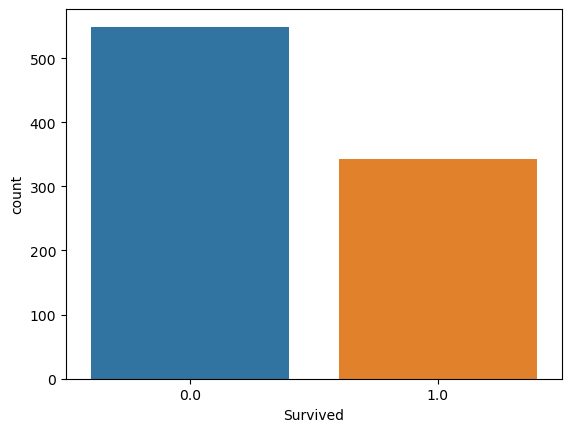

In [20]:
sns.countplot(data = df1, x = "Survived")

### Definindo função pra plotar gráficos e informar dados de acordo com interesse - hue = 'Survived'

Quantd de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantd de valores nulos: 418

Quantd por opção: 
0.0    549
1.0    342
Name: Survived, dtype: int64


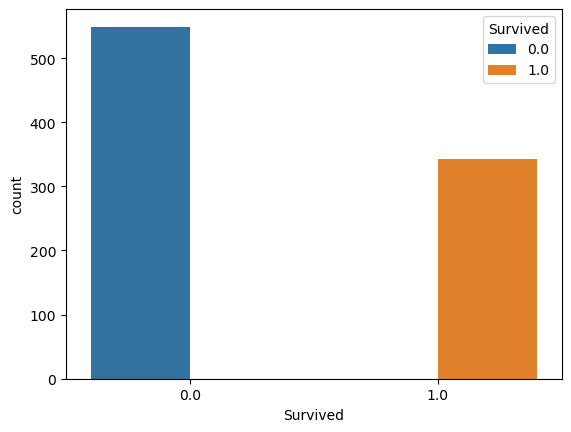

In [21]:
def titanicdf1(data, column, count = True):

    print(f'Quantd de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantd de valores nulos: {data[column].isna().sum()}')
    print(f'\nQuantd por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)
        
titanicdf1(df1, 'Survived')

## Criando coluna e atribuindo valor

Lembrando que o dataframe newdf foi criado para armazenar os dados tratados, então, ele basicamente não tem coluna nenhuma até agora.

Aqui, ao utilizar "newdf['Survived']" estamos criando uma coluna "Survived" nesse dataframe, atribuindo a ela os mesmíssimos valores presentes no dataframe utilizado para plotar o gráfico referente a essa coluna.

In [21]:
newdf['Survived'] = df1['Survived']

### Visualizando a criação

Aqui podemos ver como ficou o nosso dataframe com sua primeira coluna, observe que há valores nulos para Survived, visto que não realizei o tratamento desses valores, já que são o nosso maior interesse. Enquanto não tenho mais informações, não faz sentido tratar.

In [22]:
newdf

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


### Coluna Pclass - plot de gráfico com classe e hue = Survived

Aqui se repete o mesmo de antes, plotação de gráfico e atribuição numa nova coluna do newdf

Quantd de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantd de valores nulos: 0

Quantd por opção: 
3    709
1    323
2    277
Name: Pclass, dtype: int64


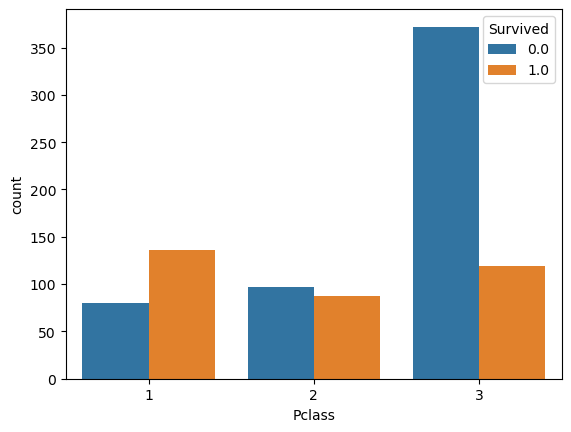

In [23]:
titanicdf1(df1, 'Pclass')

In [24]:
newdf['Pclass'] = df1['Pclass']


In [25]:
newdf

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


### Coluna Sex - plot de gráfico com gênero e hue = Survived

Aqui se repete o mesmo de antes, plotação de gráfico e atribuição numa nova coluna do newdf

Quantd de valores únicos: 2

Quais são os valores únicos: ['male' 'female']

Quantd de valores nulos: 0

Quantd por opção: 
male      843
female    466
Name: Sex, dtype: int64


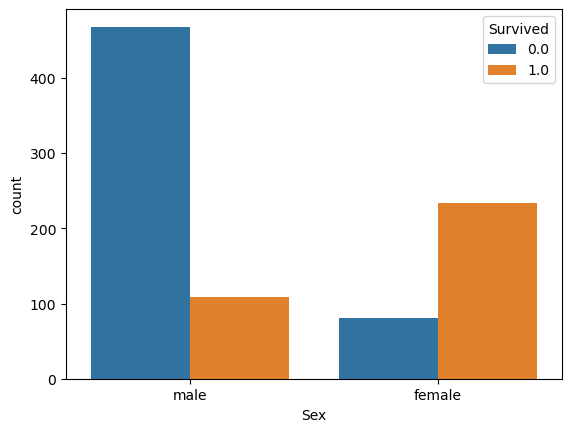

In [26]:
titanicdf1(df1, 'Sex')

In [27]:
newdf['Sex'] = df1['Sex']

newdf

,Survived,Pclass,Sex
0,0.0,3,male
1,1.0,1,female
2,1.0,3,female
3,1.0,1,female
4,0.0,3,male
...,...,...,...
1304,NaN,3,male
1305,NaN,1,female
1306,NaN,3,male
1307,NaN,3,male


### Realizando drop da coluna Sex inicial

Se analisado, é possível perceber que as outras colunas trabalham com valores numéricos ou flutuantes, porém Sex é a única coluna com valor de cadeia, não é nada útil para analisar.

In [28]:
newdf.drop('Sex', axis=1)

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


### Modificando valores

Como dito antes, precisamos de número, então, todas as informações da coluna Sex logo no dataframe de append (df1) serão substituídas por 0 (homens) e 1 (mulheres). Posteriormente, realizamos novamente a plotação de gráfico e finalmente a criação da coluna Sex em newdf e a atribuição de valores.

In [29]:
df1['Sex'] = df1['Sex'].replace(['male', 'female'], [0, 1])

In [30]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


Quantd de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantd de valores nulos: 0

Quantd por opção: 
0    843
1    466
Name: Sex, dtype: int64


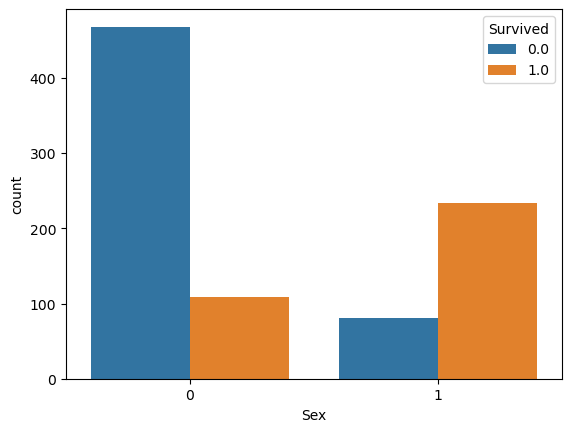

In [31]:
titanicdf1(df1, 'Sex')

In [32]:
newdf['Sex'] = df1['Sex']

newdf

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


### Coluna Age - plot de gráfico com idade

Como temos uma variedade de idades, o gráfico plotado será um pouco diferente dos anteriores, basta retornar à função de plotação titanicdf1 para analisar a condição 'else'.

Quantd de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantd de valores nulos: 263

Quantd por opção: 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: Age, Length: 98, dtype: int64


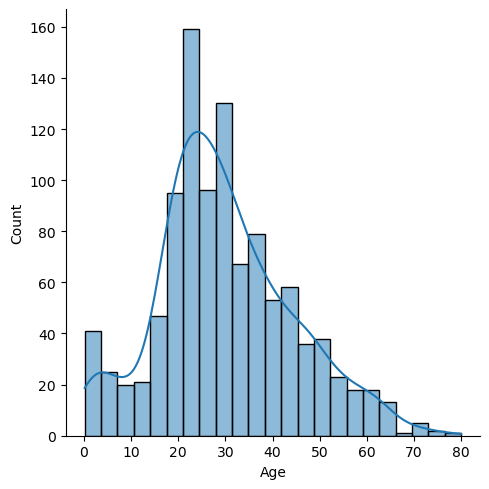

In [33]:
titanicdf1(df1, 'Age', False)

### Identificando a média de idade entre classes

Temos uma quantidade considerável de valores nulos para a coluna Age em df1, inicialmente, fiz esse **for** para identificar a média de idade entre as classes, seria mais rápido tratar esses dados nulos de acordo com essas médias.

O score final provavelmente seria menor, visto que, todos os passageiros tem um **título** (pronome de tratamento) em seus nomes, pegando o exemplo do título **master** que é utilizado para crianças de até 12 anos, é totalmente incoerente que um master de 1ª classe tenha uma idade de 39 anos, isso pode afetar sua chance de sobrevivência em nossa predição, já que sabemos que crianças tiveram uma chance maior.

In [34]:
for i in df1['Pclass'].unique():
    print(f'Pessoas da {i}ª classe tem a média de idade de: {df1[df1["Pclass"] == i]["Age"].mean():.4f}')

Pessoas da 3ª classe tem a média de idade de: 24.8164
Pessoas da 1ª classe tem a média de idade de: 39.1599
Pessoas da 2ª classe tem a média de idade de: 29.5067


### Criando dataframe de pronomes 

Não é necessário criar um novo dataframe para esse tipo de tratamento, mas, como dito antes, é meu primeiro contato com análise de dados então preciso de algo mais visual para compreender. 

Esse dataframe foi utilizado para que eu pudesse tranquilamente realizar testes para tratar as idades nulas, depois, seus valores foram atribuídos para o dataframe newdf.

In [35]:
pronoundf = pd.DataFrame()

## Explicação geral da filtragem

A maioria dos títulos foi extraída através do método **str.contains** que localiza na String em análise, se há a palavra contida. 

**Ex.:** Para master, fiz com que o método localizasse todas as linhas que contém esse título e armazenei em uma variável chamada master_f, depois, localizei no dataframe de append as linhas que continham master_f e foquei no dado que essas linhas apresentavam para a coluna **Age**, assim, peguei a média de idade e armazenei em master_age.
Arredondei em uma casa decimal esse resultado de média de idade que obtive, depois de criar a coluna Age em pronoundf, eu localizei as linhas que continham tanto master_f quanto valores nulos para a coluna Age, aí atribuí a esses valores nulos o valor da média de idade para o título de master, que no caso, é de 5.5

In [36]:
master_f = df1['Name'].str.contains('Master')

In [37]:
pronoundf['Name'] = df1['Name']

pronoundf

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
1304,"Spector, Mr. Woolf"
1305,"Oliva y Ocana, Dona. Fermina"
1306,"Saether, Mr. Simon Sivertsen"
1307,"Ware, Mr. Frederick"


### Filtro master - crianças

In [38]:
master_age = df1.loc[master_f, 'Age'].mean()

In [39]:
master_age

5.482641509433963

In [40]:
pronoundf['Age'] = df1['Age']

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [41]:
master_age = np.round(master_age, decimals=1)

In [42]:
master_age

5.5

In [43]:
pronoundf.loc[master_f & pronoundf['Age'].isnull(), 'Age'] = master_age

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


### Filtro Mrs - Senhora (casadas)

In [44]:
mrs_f = df1['Name'].str.contains('Mrs.')

mrs_f

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Name, Length: 1309, dtype: bool

In [45]:
mrs_age = np.round((df1.loc[mrs_f, 'Age'].mean()), decimals=1)

mrs_age

36.8

In [46]:
pronoundf.loc[mrs_f & pronoundf['Age'].isnull(), 'Age'] = mrs_age

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [47]:
pronoundf[pronoundf.isnull().any(axis=1)]

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
...,...,...
1275,"Wheeler, Mr. Edwin Frederick""""",NaN
1299,"Riordan, Miss. Johanna Hannah""""",NaN
1301,"Naughton, Miss. Hannah",NaN
1304,"Spector, Mr. Woolf",NaN


### Filtro Miss - Senhorita

In [48]:
ms_f = df1['Name'].str.contains('Miss.')

ms_f

0       False
1       False
2        True
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Name, Length: 1309, dtype: bool

In [49]:
ms_age = np.round((df1.loc[ms_f, 'Age'].mean()), decimals=1)

ms_age

21.8

In [50]:
pronoundf.loc[ms_f & pronoundf['Age'].isnull(), 'Age'] = ms_age

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [51]:
pronoundf[pronoundf.isnull().any(axis=1)]

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
26,"Emir, Mr. Farred Chehab",NaN
29,"Todoroff, Mr. Lalio",NaN
36,"Mamee, Mr. Hanna",NaN
...,...,...
1257,"Caram, Mr. Joseph",NaN
1271,"O'Connor, Mr. Patrick",NaN
1275,"Wheeler, Mr. Edwin Frederick""""",NaN
1304,"Spector, Mr. Woolf",NaN


In [52]:
pronoundf.loc[pronoundf['Age'].isnull() & (~pronoundf['Name'].str.contains('Mr.'))]

,Name,Age
766,"Brewe, Dr. Arthur Jackson",NaN
979,"O'Donoghue, Ms. Bridget",NaN


### Filtro Ms - Senhora (estado matrimonial desconhecido)

In [53]:
m_f = df1['Name'].str.contains('Ms.')

m_f

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Name, Length: 1309, dtype: bool

In [54]:
pronoundf.loc[pronoundf['Name'].str.contains('Ms.')]

,Name,Age
443,"Reynaldo, Ms. Encarnacion",28.0
979,"O'Donoghue, Ms. Bridget",NaN


In [55]:
pronoundf.loc[m_f & pronoundf['Age'].isnull(), 'Age'] = 28.0

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


In [56]:
pronoundf.loc[pronoundf['Name'].str.contains('Ms.')]

,Name,Age
443,"Reynaldo, Ms. Encarnacion",28.0
979,"O'Donoghue, Ms. Bridget",28.0


In [57]:
dr_f =df1['Name'].str.contains('Dr.')

In [58]:
pronoundf.loc[pronoundf['Name'].str.contains('Dr.')]

,Name,Age
47,"O'Driscoll, Miss. Bridget",21.8
130,"Drazenoic, Mr. Jozef",33.0
245,"Minahan, Dr. William Edward",44.0
317,"Moraweck, Dr. Ernest",54.0
398,"Pain, Dr. Alfred",23.0
416,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",34.0
632,"Stahelin-Maeglin, Dr. Max",32.0
660,"Frauenthal, Dr. Henry William",50.0
679,"Cardeza, Mr. Thomas Drake Martinez",36.0
766,"Brewe, Dr. Arthur Jackson",NaN


In [59]:
pronoundf.loc[pronoundf['Name'].str.contains(' Mr. ')]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
4,"Allen, Mr. William Henry",35.0
5,"Moran, Mr. James",NaN
6,"McCarthy, Mr. Timothy J",54.0
12,"Saundercock, Mr. William Henry",20.0
...,...,...
1297,"Ware, Mr. William Jeffery",23.0
1298,"Widener, Mr. George Dunton",50.0
1304,"Spector, Mr. Woolf",NaN
1306,"Saether, Mr. Simon Sivertsen",38.5


In [60]:
pronoundf.loc[pronoundf['Name'].str.contains(' Dr. ')]

,Name,Age
245,"Minahan, Dr. William Edward",44.0
317,"Moraweck, Dr. Ernest",54.0
398,"Pain, Dr. Alfred",23.0
632,"Stahelin-Maeglin, Dr. Max",32.0
660,"Frauenthal, Dr. Henry William",50.0
766,"Brewe, Dr. Arthur Jackson",NaN
796,"Leader, Dr. Alice (Farnham)",49.0
1184,"Dodge, Dr. Washington",53.0


### Filtro Dr - Doutor

In [61]:
dr_f =df1['Name'].str.contains(' Dr. ')

In [62]:
dr_age = np.round((df1.loc[dr_f, 'Age'].mean()), decimals=1)

dr_age

43.6

In [63]:
pronoundf.loc[dr_f & pronoundf['Age'].isnull(), 'Age'] = dr_age

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",NaN
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",NaN


### Filtro Mr. - Senhor

In [64]:
mr_f = df1['Name'].str.contains(' Mr. ')

mr_f

0        True
1       False
2       False
3       False
4        True
        ...  
1304     True
1305    False
1306     True
1307     True
1308    False
Name: Name, Length: 1309, dtype: bool

In [65]:
mr_age = np.round((df1.loc[mr_f, 'Age'].mean()), decimals=1)

mr_age

32.3

In [66]:
pronoundf.loc[mr_f & pronoundf['Age'].isnull(), 'Age'] = mr_age

pronoundf

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
1304,"Spector, Mr. Woolf",32.3
1305,"Oliva y Ocana, Dona. Fermina",39.0
1306,"Saether, Mr. Simon Sivertsen",38.5
1307,"Ware, Mr. Frederick",32.3


### Verificando

Há mais algum pronome sem tratamento de idade na tabela? Aparentemente não, assim, printamos o dataframe para ver seu estado sem a coluna Age implementada

In [67]:
pronoundf[pronoundf.isnull().any(axis=1)]

,Name,Age


In [68]:
newdf

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


### Atribuindo toda a filtragem para newdf

In [69]:
newdf['Age'] = pronoundf['Age']

newdf

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0
...,...,...,...,...
1304,NaN,3,0,32.3
1305,NaN,1,1,39.0
1306,NaN,3,0,38.5
1307,NaN,3,0,32.3


### Verificando se há mais valores nulos para trabalhar em newdf

In [70]:
newdf.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
dtype: int64

### Verificando se há mais valores nulos para trabalhar em df1

In [71]:
df1.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Trabalhando com SibSp e Parch

Quantd de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantd de valores nulos: 0

Quantd por opção: 
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


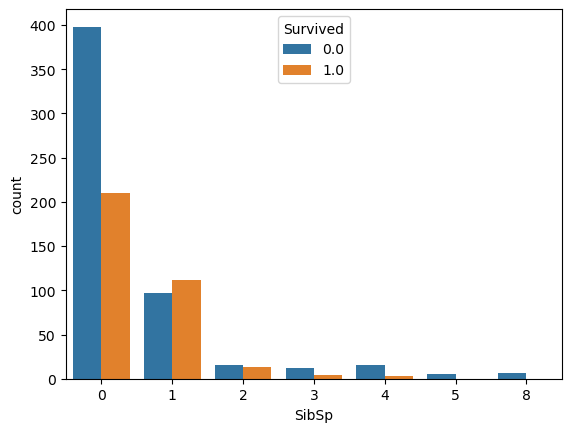

In [72]:
titanicdf1(df1, 'SibSp')

In [73]:
newdf['SibSp'] = df1['SibSp']

Quantd de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantd de valores nulos: 0

Quantd por opção: 
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64


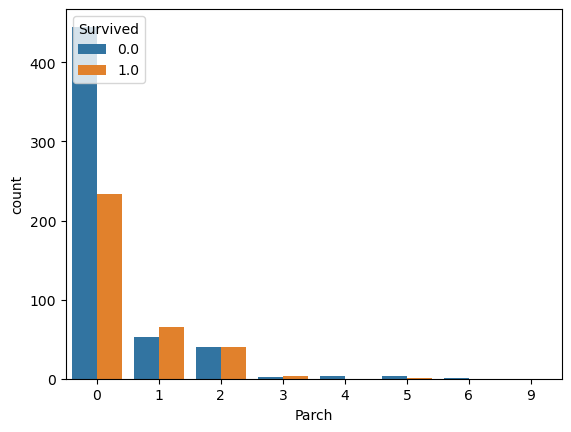

In [74]:
titanicdf1(df1, 'Parch')

In [75]:
newdf['Parch'] = df1['Parch']

## Criando coluna Family 

O tamanho da família que um passageiro possa ter levado com ele no Titanic também influência em sua sobrevivência, aqui, somei a quantidade de irmãos, conjugês (SibSp), pais e filhos (Parch) além de mais um indivíduo que é o próprio passageiro.

Logo, a passageira 1 não levou seus pais nem crianças, mas levou um acompanhante que pode ser seu irmão ou parceiro, assim, o tamanho da família que estava presente na embarcação é de 2, ela e seu irmão/parceiro.

In [76]:
df1['Family'] = df1['Parch'] + df1['SibSp'] + 1

df1.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2


In [77]:
newdf['Family'] = df1['Family']

In [78]:
newdf.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Family
0,0.0,3,0,22.0,1,0,2
1,1.0,1,1,38.0,1,0,2
2,1.0,3,1,26.0,0,0,1
3,1.0,1,1,35.0,1,0,2


### Tratando tarifa - Fare

Assim como idade, há muitos valores, logo, o gráfico é diferente dos outros. É fato de que quanto mais se pagou em tarifa para embarcar, maior a chance de sobrevivência, visto que pode apontar a classe do passageiro ou até suas condições de cabine e localização próxima a botes.

Quantd de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05

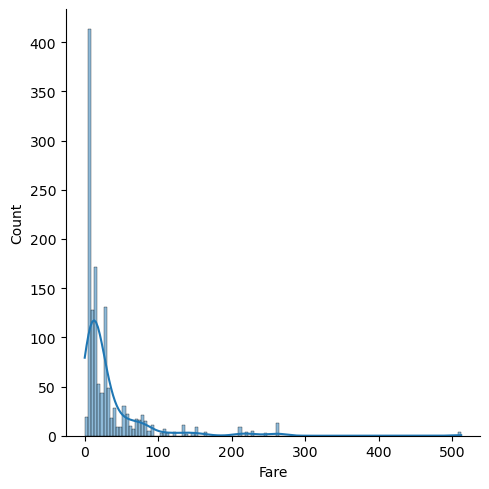

In [79]:
titanicdf1(df1, 'Fare', False)

In [80]:
df1[df1['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [81]:
np.round((df1[df1['Pclass'] == 3]['Fare'].mean()), decimals=1)

13.3

In [82]:
df1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [83]:
fillfare = np.round((df1[df1['Pclass'] == 3]['Fare'].mean()), decimals=4)

In [84]:
fillfare

13.3029

In [85]:
df1['Fare'].fillna(df1[df1['Pclass'] == 3]['Fare'].mean(), inplace=True)

In [86]:
df1.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Family            0
dtype: int64

In [87]:
newdf['Fare'] = df1['Fare']

newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Family,Fare
0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,3,0,35.0,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,32.3,0,0,1,8.0500
1305,NaN,1,1,39.0,0,0,1,108.9000
1306,NaN,3,0,38.5,0,0,1,7.2500
1307,NaN,3,0,32.3,0,0,1,8.0500


### Trabalhando com portão de embarque - Embarked

O portão de embarque tem muito haver com a classe do passageiro, como há poucos valores nulos, é possível tratar, assim, pegando a média de classe dos passageiros por portão de embarque, se trata os valores nulos de acordo com a classe. Ao final, se cria a coluna Embarked em newdf e se atribui os valores tratados.

Quantd de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantd de valores nulos: 2

Quantd por opção: 
S    914
C    270
Q    123
Name: Embarked, dtype: int64


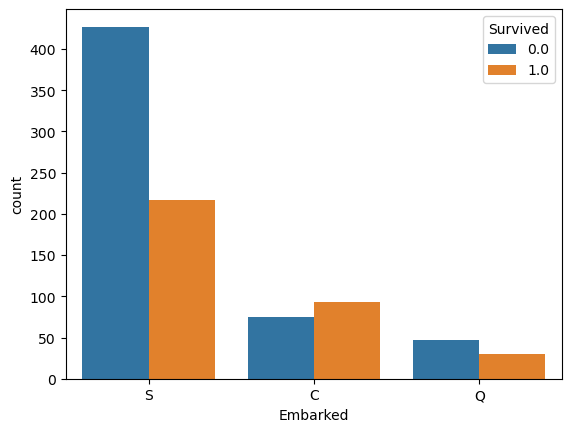

In [88]:
titanicdf1(df1, 'Embarked')

In [89]:
df1[df1['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [90]:
df1[df1['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

In [91]:
df1[df1['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [92]:
df1[df1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [93]:
df1['Embarked'].fillna("C", inplace=True)

df1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Family            0
dtype: int64

In [94]:
newdf['Embarked'] = df1['Embarked']

### Criando a coluna títulos - Titles

Nomes são irrelevantes nesse momento, Títulos são melhores de se trabalhar.

In [95]:
df1['Title'] = df1['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [96]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,1,Mr


In [97]:
df1['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

### Atribuindo person a qualquer título fora do alcance de interesse

In [98]:
df1['Title'] = [n if n in ['Miss', 'Mrs', 'Mr', 'Master'] else 'Person' for n in df1['Title']]

In [99]:
df1['Title'].nunique()

5

In [100]:
newdf['Title'] = df1['Title']

### Verificando aparência final da tabela newdf

In [101]:
newdf.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
5,0.0,3,0,32.3,0,0,1,8.4583,Q,Mr


### Iniciando o trabalho com algoritmo e predição

In [102]:
pclass = pd.get_dummies(newdf['Pclass'], drop_first = True, prefix='Pclass')
embarked = pd.get_dummies(newdf['Embarked'], drop_first = True, prefix='Embarked')
title = pd.get_dummies(newdf['Title'], drop_first = True, prefix='Title')

In [103]:
final_df = pd.concat([newdf, pclass, embarked, title], axis=1)

In [104]:
final_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Family,Fare,Embarked,Title,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr,0,1,0,1,0,1,0,0
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs,0,0,0,0,0,0,1,0
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss,0,1,0,1,1,0,0,0
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs,0,0,0,1,0,0,1,0
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,32.3,0,0,1,8.0500,S,Mr,0,1,0,1,0,1,0,0
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Person,0,0,0,0,0,0,0,1
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr,0,1,0,1,0,1,0,0
1307,NaN,3,0,32.3,0,0,1,8.0500,S,Mr,0,1,0,1,0,1,0,0


In [105]:
final_df.drop(['Pclass', 'Embarked', 'Title'], axis = 1, inplace=True)

In [106]:
final_df

,Survived,Sex,Age,SibSp,Parch,Family,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,1,0,0
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,0,0,1,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,0,1,1,0,0,0
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,1,0,0,1,0
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,32.3,0,0,1,8.0500,0,1,0,1,0,1,0,0
1305,NaN,1,39.0,0,0,1,108.9000,0,0,0,0,0,0,0,1
1306,NaN,0,38.5,0,0,1,7.2500,0,1,0,1,0,1,0,0
1307,NaN,0,32.3,0,0,1,8.0500,0,1,0,1,0,1,0,0


### Separando dataframes de treino e teste de acordo com index informado anteriormente

In [107]:
train_a = final_df[:i_train].copy()
test_a = final_df[i_test:].copy()

train_a

,Survived,Sex,Age,SibSp,Parch,Family,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Person
0,0.0,0,22.0,1,0,2,7.2500,0,1,0,1,0,1,0,0
1,1.0,1,38.0,1,0,2,71.2833,0,0,0,0,0,0,1,0
2,1.0,1,26.0,0,0,1,7.9250,0,1,0,1,1,0,0,0
3,1.0,1,35.0,1,0,2,53.1000,0,0,0,1,0,0,1,0
4,0.0,0,35.0,0,0,1,8.0500,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,0,1,13.0000,1,0,0,1,0,0,0,1
887,1.0,1,19.0,0,0,1,30.0000,0,0,0,1,1,0,0,0
888,0.0,1,21.8,1,2,4,23.4500,0,1,0,1,1,0,0,0
889,1.0,0,26.0,0,0,1,30.0000,0,0,0,0,0,1,0,0


In [108]:
train_a['Survived'] = train_a['Survived'].astype(int)

In [109]:
X = train_a.drop('Survived', axis=1)
Y = train_a['Survived']

test_X = test_a.drop('Survived', axis=1)

In [110]:
def accu_function(alg, X_train, Y_train, crossv):
    model = alg.fit(X_train, Y_train)
    accu = round(model.score(X_train, Y_train) * 100, 2)
    
    train_prediction = model_selection.cross_val_predict(alg, X_train, Y_train, cv = crossv, n_jobs = -1)
    accu_cv = round(metrics.accuracy_score(Y_train, train_prediction) * 100, 2)
    
    return accu, accu_cv

In [111]:
# Random forest

accu_rf, accu_cv_rf = accu_function(RandomForestClassifier(), X, Y, 10)

print(f"Acurácia: {accu_rf}")
print(f"Acurácia Validação Cruzada: {accu_cv_rf}")

Acurácia: 98.43
Acurácia Validação Cruzada: 80.92


In [112]:
#Log regress

accu_log, accu_cv_log = accu_function(LogisticRegression(max_iter = 1000), X, Y, 10)

print(f"Acurácia: {accu_log}")
print(f"Acurácia Validação Cruzada: {accu_cv_log}")

Acurácia: 83.16
Acurácia Validação Cruzada: 82.6


In [113]:
#K-nearest neighbors

accu_knn, accu_cv_knn = accu_function(KNeighborsClassifier(), X, Y, 10)

print(f"Acurácia: {accu_knn}")
print(f"Acurácia Validação Cruzada: {accu_cv_knn}")

C:\Users\anagi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Acurácia: 81.14
Acurácia Validação Cruzada: 72.28


In [115]:
# GradientBoostingClassifier

accu_gb, accu_cv_gb = accu_function(GradientBoostingClassifier(), X, Y, 10)

print(f"Acurácia: {accu_gb}")
print(f"Acurácia Validação Cruzada: {accu_cv_gb}")

Acurácia: 89.79
Acurácia Validação Cruzada: 82.94


In [116]:
# LinearSVC

accu_ls, accu_cv_ls = accu_function(LinearSVC(dual=False), X, Y, 10)

print(f"Acurácia: {accu_ls}")
print(f"Acurácia Validação Cruzada: {accu_cv_ls}")

Acurácia: 83.39
Acurácia Validação Cruzada: 82.83


In [121]:
params = dict (max_depth = [n for n in range(1, 5)], min_samples_split = [n for n in range(2, 6)], min_samples_leaf = [n for n in range(2, 6)], n_estimators = [n for n in range(10, 50, 10)],)

In [125]:
gbc = GradientBoostingClassifier()
gbc_cv = GridSearchCV(estimator = gbc, param_grid = params, cv = 10) 
gbc_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [126]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

gradientBoostingClassifier_pred = gbc_cv.predict(test_X)

Melhor pontuação: 0.8485518102372035
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3,
                           n_estimators=40)


### Finalizando:

Atribuindo a um novo dataframe o ID de passageiro (que tornamos uma variável lá no início) na coluna **PassengerID** e sua situação de sobrevivência de acordo com a predição do GradientBoostingClassifier, isso na coluna **Survived**.

### Submissão

Transformando o dataframe novo em arquivo .csv para finalmente poder fazer a submissão ao kaggle.

In [132]:
submission = pd.DataFrame({'PassengerId': passenger, 'Survived': gradientBoostingClassifier_pred})

submission.to_csv('./titanic_pred.csv', index=False)

**Feito por: Ana Giulia Moreira de Lima**


**Score: 0.7799**